In [ ]:
! pip install langchain-community faiss-cpu langchain-openai tiktoken pypdf chromadb
! pip install Together
! pip install --upgrade langchain-together

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.1 MB/s eta 0:00:

# Advanced Retrival methods

## Maximum marginal relevance (MMR)


MMR (Maximal Marginal Relevance) is a technique used in the context of Retrieval-Augmented Generation (RAG) to enhance the quality and relevance of information retrieved from large datasets or knowledge bases.

### Why MMR is Needed
In a typical RAG setup, a retrieval module fetches relevant documents or passages based on a query, and a generative model uses these documents to generate a response. The challenge lies in ensuring that the retrieved documents are not only relevant but also diverse, covering different aspects of the query. This is where MMR comes into play:

- **Relevance and Diversity:** MMR balances relevance and diversity in the retrieved documents. It ensures that while the documents are relevant to the query, they also provide diverse perspectives, reducing redundancy.
- **Avoiding Redundancy:** Without MMR, the retrieval process might fetch multiple documents that contain similar information, which can lead to redundancy and a narrow view of the topic.
- **Comprehensive Responses:** By incorporating diverse documents, MMR helps the generative model create more comprehensive and well-rounded responses, covering various facets of the query.

In [ ]:
!gdown 1yVbhJWh4L1unDbDT4APOusTXlwic7aE9
!gdown 1-F1DO6UNkz3ndjSV4kSzu7zcaQJtf5De
!gdown 1LouWfzlgol2J2EdqFy0YVIPh93uSq2ON

Downloading...
From: https://drive.google.com/uc?id=1yVbhJWh4L1unDbDT4APOusTXlwic7aE9
To: /content/PA - Consolidated lecture notes.pdf
100% 4.28M/4.28M [00:00<00:00, 164MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-F1DO6UNkz3ndjSV4kSzu7zcaQJtf5De
To: /content/SQL Revision Notes.pdf
100% 2.62M/2.62M [00:00<00:00, 180MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LouWfzlgol2J2EdqFy0YVIPh93uSq2ON
To: /content/2022_Annual_Report.pdf
100% 2.39M/2.39M [00:00<00:00, 189MB/s]


In [ ]:
from langchain.document_loaders import PyPDFLoader

# Load PDF

loaders = [
    # Duplicate documents on purpose - messy data
    PyPDFLoader("2022_Annual_Report.pdf"),
    PyPDFLoader("2022_Annual_Report.pdf")
]
docs = []
for loader in loaders:
    docs.extend(loader.load())

- here we have added duplicate data on purpose, in real life even though the data might not be actually duplicate but it can be very similar
- or for creating a more robust information base we get multiple data sources, that have the same thing mentioned multiple times, so for replicating that here we are using duplicate docs

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150,
    separators=["\n\n","\n","."," "]
)

In [ ]:
splits = text_splitter.split_documents(docs)

In [ ]:
# Embeddings
! pip install sentence-transformers
from langchain.embeddings import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings()

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

from langchain_community.vectorstores import FAISS

db = FAISS.from_documents(splits, embedding)
print(db.index.ntotal)

498


- this step will take a bit of time as the anual report is huge

In [ ]:
query = "what is discussed about metrics "
docs = db.similarity_search(query)


In [ ]:
for results in docs:
  print(results.page_content.replace("\n", " "))
  print("------------------------------------------")

resources. We disclose metrics to enable investors to evaluate progress against our ambitions, provide transparency into  performance tren ds, and reflect the continued evolution of our products and services. Our commercial and other business  metrics are fundamentally connected based on how customers use our products and
------------------------------------------
resources. We disclose metrics to enable investors to evaluate progress against our ambitions, provide transparency into  performance tren ds, and reflect the continued evolution of our products and services. Our commercial and other business  metrics are fundamentally connected based on how customers use our products and
------------------------------------------
significantly affect revenue and expenses. Fluctuations in the U.S. dollar rel ative to certain foreign currencies did not have  a material impact on reported revenue or expenses from our international operations in fiscal year 2022.   Refer to Risk Factors in our f

#### Now lets try the same with MMR

In [ ]:
docs_mmr = db.max_marginal_relevance_search(query ,k=4)

In [ ]:
for results in docs_mmr:
  print(results.page_content.replace("\n", " "))
  print("------------------------------------------")

resources. We disclose metrics to enable investors to evaluate progress against our ambitions, provide transparency into  performance tren ds, and reflect the continued evolution of our products and services. Our commercial and other business  metrics are fundamentally connected based on how customers use our products and
------------------------------------------
For derivative instruments designated as fair value hedges, gains and losses are recognized in other income (expense),  net with offsetting gains and losses on the hedged  items. Gains and losses representing hedge components excluded  from the assessment of effectiveness are recognized in other income (expense), net.   For derivative instruments designated as cash flow hedges, gains and losses are initially reported as a com ponent of  other comprehensive income and subsequently recognized in other income (expense), net with the corresponding hedged  item. Gains and losses representing hedge components excluded from the asse

### Examples where MMR would be very useful
- Scenario: Aggregating news articles on a specific event, such as a natural disaster or political event.
  - Reason: MMR helps ensure that the aggregated news articles are not only relevant to the event but also cover different aspects and perspectives, such as eyewitness accounts, official statements, expert analyses, and on-the-ground reports. This prevents redundancy and provides a more comprehensive view of the event.
- Scenario: Summarizing customer reviews for a product on an e-commerce platform.
  - Reason: MMR helps in selecting reviews that are relevant to key aspects of the product (e.g., quality, usability, price) while also reflecting a range of opinions (positive, negative, and neutral). This ensures a balanced summary that helps potential buyers make informed decisions.

## Chroma DB
Chroma DB is an open-source embedding database designed to optimize the process of managing, storing, and querying embeddings for various AI applications, particularly for retrieval-augmented generation (RAG).

### Advantages of chroma DB
- Dynamic Updating: Unlike FAISS, which can be cumbersome to update, Chroma DB allows for dynamic updates of the embedding database, supporting both addition and deletion of records on the fly.
  - in faiss once you build the index you cannot add more data to it, for doing that you'll have to rebuild it again, which is not ideal in some cases.

- Optimized for Large Datasets: Chroma DB is designed to handle large-scale datasets efficiently, providing better performance compared to FAISS, especially as your data grows.

- Complex Queries: Applications that require advanced querying capabilities, such as combining vector searches with metadata filtering, and Cross encoder reranking etc, built directly into chroma db, which we will lopk into a while. (some of them can be used with faiss with langchains help, but are not native to it)

In [ ]:
loaders = [
    # Duplicate documents on purpose - messy data
    PyPDFLoader("2022_Annual_Report.pdf"),
    PyPDFLoader("PA - Consolidated lecture notes.pdf")]
docs = []
for loader in loaders:
    docs.extend(loader.load())

splits = text_splitter.split_documents(docs)

split_texts=[str(doc.page_content) for doc in splits]

In [ ]:
len(split_texts)

287

In [ ]:
import chromadb
from chromadb.utils.embedding_functions import create_langchain_embedding

ef = create_langchain_embedding(embedding)


we are using the same embedding function that we created before and using the same one here
- to use the same function we need to use the langchain embedding function with chromadb
- Chroma offers a built-in adapter to convert Langchain's embedding function to an adapted embeddings that can be used by both LC and Chroma.

In [ ]:
chroma_client = chromadb.Client() # we create a chromadb client like we created for everyother
client = chromadb.PersistentClient(path="database") # This initializes a persistent client, meaning the data will be stored persistently on disk rather than in memory.

chroma_collection = chroma_client.create_collection("2022_Annual_Report_microsoft", embedding_function=ef) # This method creates a new collection within ChromaDB.
# any document added to this collection will be processed using the ef function to generate its embedding.

- A collection is a logical grouping of embeddings (and their associated documents) that you can query and manage together.

if a collection already exists create another one with a different name

In [ ]:

ids = [str(i) for i in range(len(split_texts))] #creating ids for all splits

chroma_collection.add(ids=ids, documents=split_texts)
chroma_collection.count() # verify that all the documents were added successfully.


287

retrival part

In [ ]:
query = "What was the total revenue?"

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

for document in retrieved_documents:
    print((document))
    print('\n')

was as follows:  
  
(In millions)          
        
Year Ended June  30, 2022  2021  2020  
        
United States (a) $ 100,218   $ 83,953   $ 73,160   
Other countries   98,052    84,135    69,855         
Total  $ 198,270   $ 168,088   $ 143,015           
(a) Includes billings to OEMs and certain multinational organizations because of the nature of these businesses and the 
impracticability of determining the geographic source of the revenue.  
Revenue, classified by significant product and service offerings, was  as follows:  
  
(In millions)          
        
Year Ended June  30, 2022  2021  2020  
        
Server products and cloud services  $ 67,321   $ 52,589   $ 41,379   
Office products and cloud services   44,862    39,872    35,316   
Windows   24,761    22,488    21,510   
Gaming   16,230    15,370    11,575   
LinkedIn   13,816    10,289    8,077   
Search and news advertising   11,591    9,267    8,524   
Enterprise Services   7,407    6,943    6,409   
Devices   6,

In [ ]:
from langchain_together import ChatTogether
import api_key

llm = ChatTogether(api_key=api_key.api, temperature=0.0, model="meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo")

In [ ]:
def rag(query, retrieved_documents, llm=llm):
    information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": "You are a helpful expert financial research assistant. Your users are asking questions about information contained in an annual report."
            "You will be shown the user's question, and the relevant information from the annual report. Answer the user's question using only this information."
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]

    response = llm.invoke(messages)

    content = response.content
    return content

In [ ]:
output = rag(query=query, retrieved_documents=retrieved_documents)

print((output))

The total revenue for the year ended June 30, 2022, was $198,270 million.


## Cross-encoder re-ranking

Cross-encoder re-ranking is a technique used in Retrieval-Augmented Generation (RAG) systems to improve the quality of retrieved documents. It involves feeding both the query and a candidate document into a single encoder, which then produces a relevance score. This score is used to re-rank the initial list of documents, placing the most relevant ones at the top.

- While MMR helps in selecting diverse and relevant documents, it may still rely on initial retrieval scores that are not highly accurate. Cross-encoders provide more precise relevance scoring by deeply analyzing the query-document pairs.



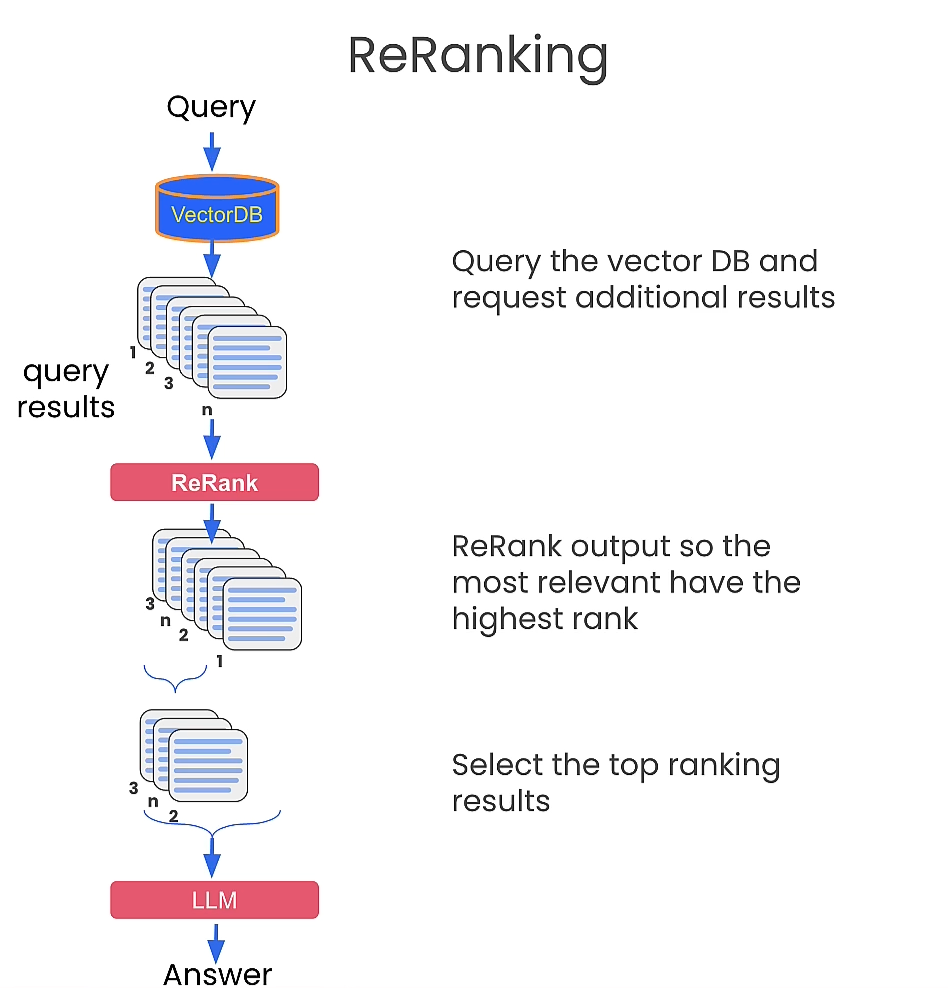


thi is mostly used to first retrieve more than required documents, that rank the top ones and use them to get the final answer.

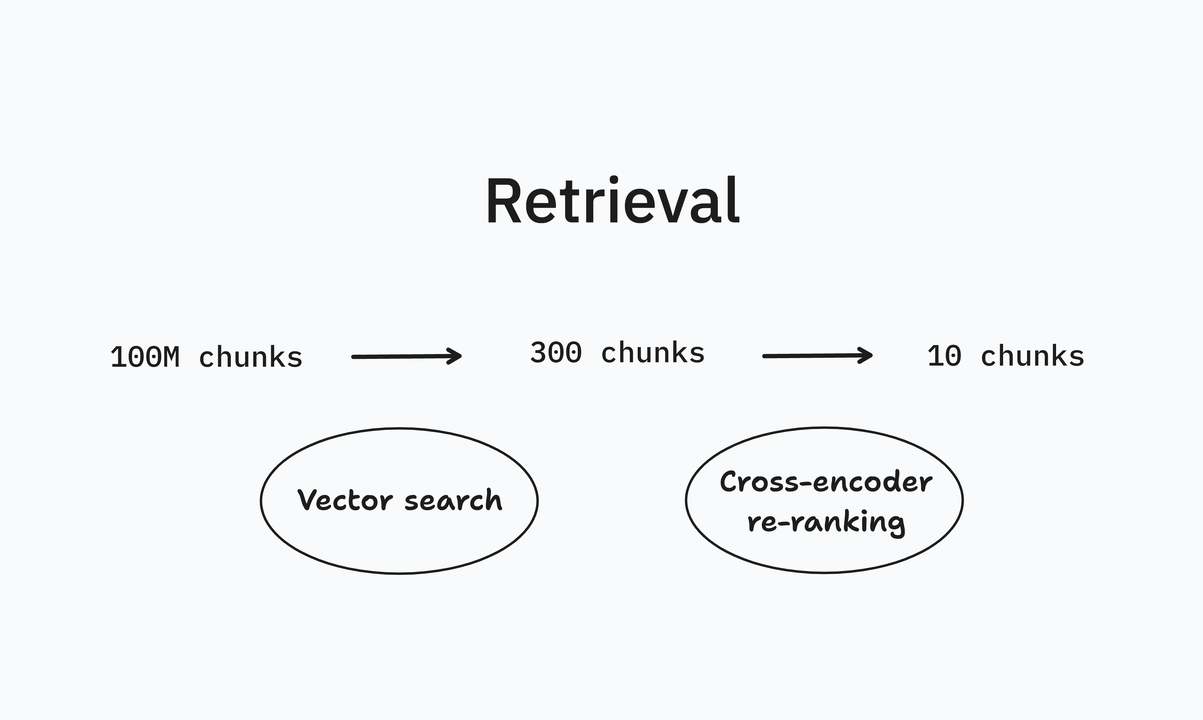

### When Normal Retrieval or Nearest Neighbor Retrieval Fails

- Vector search and similarity search are mostly very helpful, but sometimes may not be able to get the most relevant information because
  - When the database becomes huge, and the chuink sizes are also big, it get a bit difficult for the similarity search to find most relevance, because as the chunk size and document size increases, more information may also lead to ambiguity and change in complete meaning

- Ambiguous Queries: Queries with multiple interpretations may lead to retrieval of documents that are only partially relevant or miss the specific context intended by the user.

  - A query for "Apple" might retrieve documents about the fruit instead of the technology company, or vice versa, depending on the context encoded in embeddings.

  

In [ ]:
query = "What all areas are explored for AI"
results = chroma_collection.query(query_texts=query, n_results=8, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print((document))
    print('')

solution. We are accelerating adoption of AI innovations from research to products. Our innovation helps every developer 
be an AI developer, with approachable new tools from Azure Machine Learning Studio for c reating simple machine 
learning models, to the powerful Azure Machine Learning Workbench for the most advanced AI modeling and data 
science. From GitHub to Visual Studio, we provide a developer tool chain for everyone, no matter the technical 
experience, a cross all platforms, whether Azure, Windows, or any other cloud or client platform.  
Additionally, we are extending our infrastructure beyond the planet, bringing cloud computing to space. Azure Orbital is a 
fully managed ground station as a service for fa st downlinking of data.  
Create More Personal Computing  
We strive to make computing more personal by putting people at the core of the experience, enabling them to interact with 
technology in more intuitive, engaging, and dynamic ways. Microsoft 365 is em powering p

- well use sentance transformer library to use the cross encoder model.
- like we used to load a lot of models from the huggingface library we will again load it from sentence transformer library

In [ ]:
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction
from sentence_transformers import CrossEncoder
cross_encoder = CrossEncoder("BAAI/bge-reranker-v2-m3")

### Cross encoder reranking models


- Input: A cross-encoder takes both the query and a candidate document as input simultaneously.
- Processing: It processes the query and document together through the model, allowing for direct interaction between them at every layer.
- Output: The model outputs a single relevance score indicating how well the document matches the query.
- Ranking: Documents are then ranked based on these relevance scores.


Cross-encoders directly compare the query and document, capturing nuanced relationships between them.


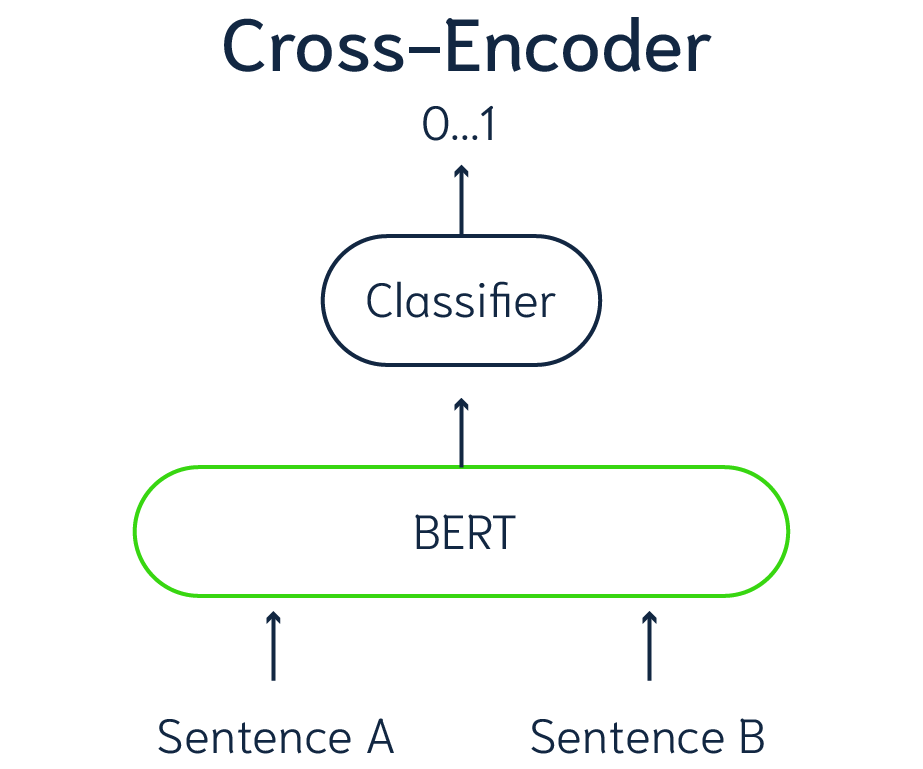

- in our cases each of the terieved result is

https://huggingface.co/BAAI/bge-reranker-v2-m3

BAAI/bge-reranker-v2-m3: Lightweight reranker model, possesses strong multilingual capabilities, easy to deploy, with fast inference.

- this scoring step would run slow, because we are running it localy on a cpu

In [ ]:
pairs = [[query, d_i] for d_i in retrieved_documents]
scores = cross_encoder.predict(pairs)
print("Scores:")
for score in scores:
    print(score)

Scores:
0.002256405
0.00054811314
0.0005533232
0.0052986923
0.005582291
0.021202508
0.0017814145
8.428376e-05


- the scores are very low because the retrived documents contain huge chunks of information, not just the exact answer.
- the scores over here are just used for ranking purposes, the absolute values are less important than their relative magnitudes.

In [ ]:
import numpy as np
print("New Ordering:")
new_ord=[]
for o in np.argsort(scores)[::-1]:
    print(o)
    new_ord.append(o)


New Ordering:
5
4
3
0
6
2
1
7


In [ ]:
information=""
i=0
for n in new_ord:
  print(n)
  information = "\n\n".join(retrieved_documents[n])
  i+=1
  if(i==4):
    break #taking the first 4 out of 8

5
4
3
0


In [ ]:
messages = [
        {
            "role": "system",
            "content": "You are a helpful expert AI research assistant. Your users are asking questions about information contained in an annual report."
            "You will be shown the user's question, and the relevant information from the annual report. Answer the user's question using only this information."
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]

response = llm.invoke(messages).content

In [ ]:
response

'The areas explored for AI include:\n\n1. Accelerating the adoption of AI innovations from research to products.\n2. Helping every developer become an AI developer, with a new approach and new tools from Azure Machine Learning Studio for creating simple machine learning models.\n3. The powerful Azure Machine Learning Workbench for the most advanced AI modeling and data science.\n4. Extending our infrastructure beyond the planet, bringing cloud computing to space.\n5. Creating more personal computing by putting people at the core of the experience, enabling them to interact with technology in more intuitive, engaging, and dynamic ways.\n6. Making computing more pervasive and ubiquitous, with the Internet of Things (IoT), mixed reality, and other emerging technologies.\n7. Empowering people and organizations to achieve more, with a platform that is more trusted, secure, and responsible.'

## Query expansion


- we can use on more technique to even furthur improve the results

Query expansion with Large Language Models (LLMs) is a technique used to enhance the quality of search results in information retrieval systems. It involves expanding the original user query with additional terms or phrases that are semantically related, thereby improving the chances of retrieving more relevant documents.

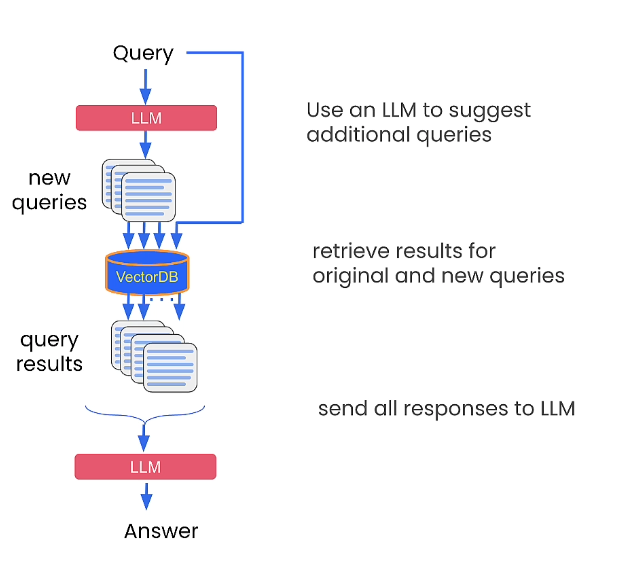

LLMs have a deep understanding of context and semantics, allowing them to suggest terms that are not only related but also contextually appropriate.

- By adding related terms, the search system can retrieve more documents that are relevant but might not have been retrieved with the original query alone.



In [ ]:
def augment_multiple_query(query, llm=llm):
    messages = [
            {
                "role": "system",
                "content": "You are a helpful expert financial research assistant. Your users are asking questions about an annual report. "
                "Suggest up to four additional related questions to help them find the information they need, for the provided question. "
                "Suggest only short questions without compound sentences. Suggest a variety of questions that cover different aspects of the topic."
                "Make sure they are complete questions, and that they are related to the original question."
                "Output one question per line. Do not number the questions."
            },
            {"role": "user", "content": query}
        ]

    response = llm.invoke(messages).content
    response = response.split("\n")
    return response


In [ ]:
original_query = "What has been the investment in AI research?"
augmented_queries = augment_multiple_query(original_query)

for query in augmented_queries:
    print(query)

What is the breakdown of the investment in AI research by department or division?
What percentage of the company's total research budget is allocated to AI research?
How has the investment in AI research impacted the company's revenue growth?
What specific AI technologies has the company been investing in?


In [ ]:
queries = [original_query] + augmented_queries

results = chroma_collection.query(query_texts=queries, n_results=6, include=['documents', 'embeddings'])
retrieved_documents = results['documents']